# IN3063 Group 2 Coursework Task 1

# Table of Contents

1. [Imports](#Imports:) 
2. [Dataset Selection and description](#a-dataset-selection-and-description)
3. [Implement sigmoid and ReLU layers](#b-implement-sigmoid-and-relu-layers)
4. [Implement dropout](#d-implement-dropout)
5. [Implement a fully parameterizable neural network class](#e-implement-a-fully-parametrizable-neural-network-class)
6. [Implement optimizer](#f-implement-optimizer)
7. [Evaluate different neural network architectures/parameters present and discuss your results](#g-evaluate-different-neural-network-architecturesparameters-present-and-discuss-your-results)
8. [Code quality and report and presentation](#h-code-quality-and-report-presentation)

## a) Dataset selection and description

Label: 5


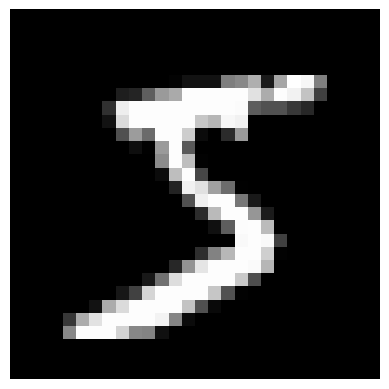

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())

image, label = mnist_dataset[0]
print("Label:" , label)

plt.imshow(image.squeeze(), cmap="gray")
plt.axis("off") 
plt.show()

## b) Implement sigmoid and ReLU layers

In [6]:
import numpy as np

class SigmoidLayer:
    def __init__(self):
        self.activation_output = None
    
    def forward_pass(self, x):
        self.activation_output = 1 / (1 + np.exp(-x))
        return self.activation_output
    
    def back_pass(self, upstream_gradient):
        return (1 - self.activation_output) * self.activation_output * upstream_gradient #return the local gradient 
    

class ReLULayer:
    def __init__(self):
        self.output = None

    def forward_pass(self, x):
        self.output = np.maximum(0, x) #relu is like _/ so max of zero and x 
        return self.output

    def back_pass(self, grad_output):
        return grad_output * np.where(self.output > 0, 1, 0)

## c) Implement softmax layer

The goal of the softmax layer is to convert raw scores (logits) from the neural network into probabilites that sum to 1.

Here is the softmax formula: $ f(z)_i = \frac{(e^z)_i}{\Sigma_j^K(e^z)_j} $

In [ ]:
import numpy as np

class SoftmaxLayer:
    self.output = None
    self.input = None
    self.dinputs = None

    def forward_pass(self, inputs):
        self.input = inputs
        inputs_stable = inputs - np.max(inputs, axis=1, keepdims=True) # stabalize inputs as exponentials grow very large or very small (numerical overflow/underflow)
        exp_values = np.exp(inputs_stable)
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return self.output
    
    def backward_pass(self, dvalues, true_labels):
        samples = dvalues.shape[0] # batch size
        self.dinputs = (self.output - true_labels) / samples
        return self.dinputs

## d) Implement dropout

The goal of the dropout layer is to improve the model's generalization and reduce overfitting by randomly temporarily disabling a fraction of the neurons during training, to prevent the model over-relying on specific neurons

In [ ]:
import numpy as np

class DropoutLayer:
    def __init__(self, rate):
        self.rate = rate
        self.mask = None

    def forward_pass(self, inputs, training=True):
        if training:
            self.mask = (np.random.rand(*inputs.shape) > self.rate) / (1 - self.rate)
            return inputs * self.mask
        else:
            return inputs
    
    def backward_pass(self, dvalues):
        return dvalues * self.mask

## e) Implement a fully parametrizable neural network class

## f) Implement optimizer

## g) Evaluate different neural network architectures/parameters, present and discuss your results. 

## h) Code quality and report presentation 